<a href="https://colab.research.google.com/github/Khey17/100-Days-Of-ML-Code/blob/main/Neural_Network_Classification_with_TensorFlow_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## What we're going to cover

* Architecture of neural network classification model
* Input shapes and output shapes of a classification model (features and labels)
* Creating custom data to view and fit
* Steps in modelling
> Creating a model, compiling a model, fitting a model, evaluating a model
* Different classification evaluation methods
* Saving and Loading models

### Let's Cook

Tensor -> [batch_size, width, height, color_channels] = [None/32, 224, 224, 3] (Shape of the tensor)

[A Recipe for Training Neural Network](https://karpathy.github.io/2019/04/25/recipe/) - Andrej Karpathy

### Introduction to neural network classification with TensorFlow

In this notebook we're going to write neural networks for classification problems.

A classification is where you try to classify something as one thing or another.

A few types of classification problems:
- Binary Classification
- Multiclass Classification
- Multilabel Classification

### Creating data to view and fit

In [1]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples, noise=0.03, random_state=42)

In [2]:
# Check out features
X[:10]

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       [-0.39373073,  0.69288277],
       [ 0.44220765, -0.89672343],
       [-0.47964637,  0.67643477],
       [-0.01364836,  0.80334872],
       [ 0.77151327,  0.14775959],
       [-0.16932234, -0.79345575],
       [-0.1214858 ,  1.02150905]])

In [3]:
# Check the labels
y[:10]


array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Our data is a little hard to understand right now.... let's visualize it!

In [4]:
import pandas as pd
circles = pd.DataFrame({"x": X[:, 0], "y": X[:, 1], "label": y})
circles.head(), circles.shape

(          x         y  label
 0  0.754246  0.231481      1
 1 -0.756159  0.153259      1
 2 -0.815392  0.173282      1
 3 -0.393731  0.692883      1
 4  0.442208 -0.896723      0,
 (1000, 3))

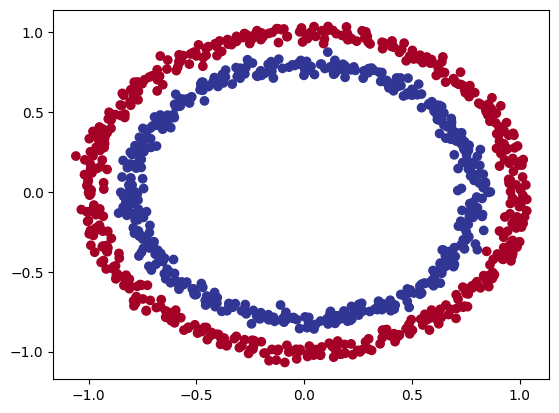

In [5]:
# Visualize with plot
import matplotlib.pyplot as plt

plt.scatter(circles["x"], circles["y"], c=circles["label"], cmap=plt.cm.RdYlBu)

📑**Resources:** [Neural Network Playground](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.35340&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)

### Input and Output shapes

In [6]:
X.shape, y.shape

((1000, 2), (1000,))

In [7]:
# How many samples are we working with?
len(X), len(y)

(1000, 1000)

In [8]:
# View the first example of features and labels
X[42], y[42]

(array([-0.71424251, -0.67921777]), 0)

### Steps in modelling

1. Get the data ready
2. Build or pick a pretrained model (to suit your problem).
3. Fit the model to the data and make a prediction.
4. Evaluate the model
5. Improve through experimentation.

In [19]:
import tensorflow as tf

# Set the random seed
tf.random.set_seed(42)

# 1. Create the mdoel using the Sequential API
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit the model
model_1.fit(X, y, epochs=5)

# 4. Evaluate the model
model_1.evaluate(X, y)

Epoch 1/5
32/32 [==============================] - 1s 3ms/step - loss: 2.8105 - accuracy: 0.4820
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7470 - accuracy: 0.5030
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7116 - accuracy: 0.4980
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6997 - accuracy: 0.4950
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6944 - accuracy: 0.5030


[0.6944351196289062, 0.503000020980835]

In [20]:
# Let's try and improve our model by training for longer
model_1.fit(X, y, epochs=200, verbose=0)
model_1.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

Since we're working on a classification problem and our model is getting around ~50% accuracy... it's performing as if it's guessing.

So let's step things up a notch and add an extra layer.

In [21]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# Fit the model
model_2.fit(X, y, epochs=100, verbose=0)

# Evaluate the model
model_2.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6932792067527771, 0.5]

### Improving our model

Let's look into our bag of tricks to see how we can improve our model.

1. Create a model - we can add more layers or increase the number of hidden units within a layer.
2. Compiling a model - here we can choose different optimization function such as adam instead of SGD.
3. Fitting a model - perhaps we might fit our model for more epochs (leave it training for longer).

In [22]:
circles['label'].value_counts()

1    500
0    500
Name: label, dtype: int64

### Common ways to improve a deep learning model

- Adding Layers
- Increase the no. of hidden units.
- Change the activation functions.
- Change the optimization function.
- Change the learning rate.
- Fitting on more data.
- Fitting for longer.

In [25]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model (this time 3 layers)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),  # Adding 100 neurons
    tf.keras.layers.Dense(10), # Add another layer with 10 mroe neurons
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Fit the model
model_3.fit(X, y, epochs=100, verbose=0)

# 4. Evaluate the model
model_3.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.7000 - accuracy: 0.5090


[0.6999572515487671, 0.5090000033378601]

In [24]:
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 1)                 3         
                                                                 
 dense_9 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5 (20.00 Byte)
Trainable params: 5 (20.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


🔑**Note:** Whenever your model is performing strangely or there's something going on with your data you're not quite sure of, remember these three words: visualize, visualize, visualize. Inspect your data, inspect your model, inpsect your model's predictions.

To visualize our model's predictions, Let's create a function `plot_decision_boundary()`, this function will:

* Take in a trained model, features (X) and labels (y)
* Create a meshgrid (numPy) of the different X values
* Make predictions across the meshgrid
* Plot the predictions as well as line between zones (where each unique class falls)

In [60]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html

  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


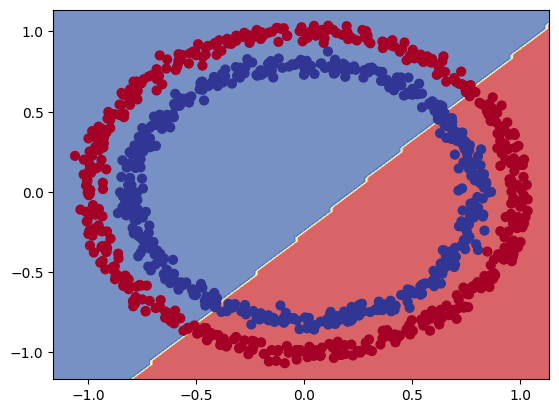

In [61]:
# Check out the predictions our model is making
plot_decision_boundary(model=model_3, X=X, y=y)

Oh wait... we compiled our model for a binary classification problem.

But... we're now working on a regression problem, let's change the model to suit our data.

In [63]:
# Let's see if our model can be used for a regression problem...
tf.random.set_seed(42)

# Create some regression data
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5) # y = X + 100

# Split our regression data into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit our model to the regression data
model_3.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100, verbose=1)

# Evaluate our model on the test set
model_3.evaluate(X_reg_test, y_reg_test)

Epoch 1/100


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 280, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_7' (type Sequential).
    
    Input 0 of layer "dense_13" is incompatible with the layer: expected axis -1 of input shape to have value 2, but received input with shape (None, 1)
    
    Call arguments received by layer 'sequential_7' (type Sequential):
      • inputs=tf.Tensor(shape=(None, 1), dtype=int32)
      • training=True
      • mask=None


In [64]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_4.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

# Fit the model
model_4.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100, verbose=1)

# Evaluate the model
model_4.evaluate(X_reg_test, y_reg_test)

Epoch 1/100
5/5 [==============================] - 1s 4ms/step - loss: 339.4164 - mae: 339.4164
Epoch 2/100
5/5 [==============================] - 0s 2ms/step - loss: 233.2718 - mae: 233.2718
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 128.5748 - mae: 128.5748
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 47.9409 - mae: 47.9409
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 77.4752 - mae: 77.4752
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 72.5656 - mae: 72.5656
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 45.3251 - mae: 45.3251
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 53.3201 - mae: 53.3201
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 45.8073 - mae: 45.8073
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 46.3177 - mae: 46.3177
Epoch 11/100
5/5 [==============================] - 0

[63.833770751953125, 63.833770751953125]

2/2 [==============================] - 0s 4ms/step


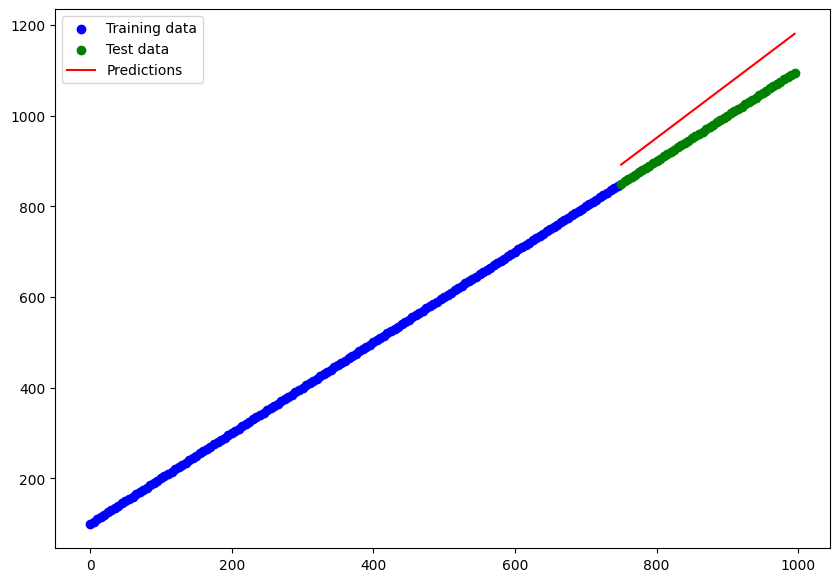

In [65]:
# Make predictions with our trained model
y_reg_preds = model_4.predict(X_reg_test)

# Plot the model's predictions against our regression data
plt.figure(figsize=(10,7))
plt.scatter(X_reg_train, y_reg_train, color='b', label='Training data')
plt.scatter(X_reg_test, y_reg_test, c='g', label='Test data')
plt.plot(X_reg_test, y_reg_preds, color='r', label='Predictions')
plt.legend();

### The missing piece: Non-linearity

In [66]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1, activation='softmax')
])

# 3. Compile the model
model_5.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# 4. Fit the model
history = model_5.fit(X, y, epochs=100, verbose=1)


Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 0.6926 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6884 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6851 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6824 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6792 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6755 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6712 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6677 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6627 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6583 - accuracy: 0.5000
Epoch 11/

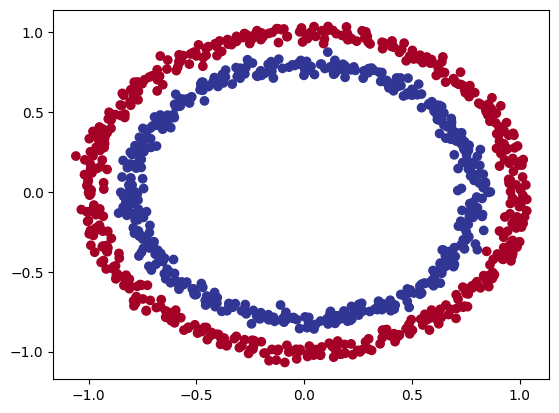

In [67]:
# Check out our data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


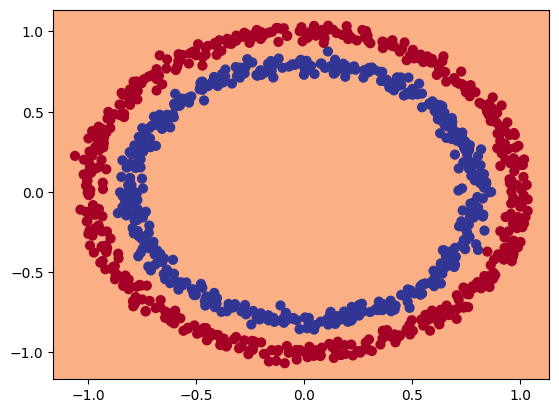

In [68]:
# Check the decision boundary for our latest model
plot_decision_boundary(model=model_5, X=X, y=y)